In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pylab import rcParams
import os
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_used_for_practice/anomaly-temp.csv', index_col = "Date", parse_dates = True).asfreq("D")
df = df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
df.head()


,Daily minimum temperatures,Dmt
Date,,
1981-01-01,20.7,20.7
1981-01-02,17.9,17.9
1981-01-03,18.8,18.8
1981-01-04,14.6,14.6
1981-01-05,15.8,15.8


In [6]:
df.rename(columns = {'Daily minimum temperatures':'dmt_wrk'}, inplace = True)
df = df.drop(['Dmt'], axis = 1)

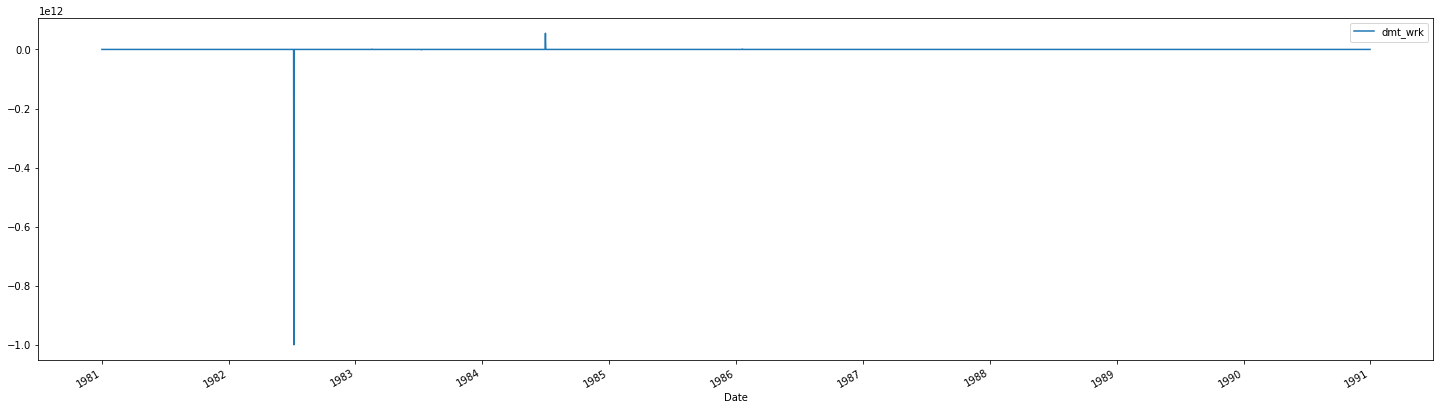

In [7]:
df = df.astype('float')
rcParams['figure.figsize'] = 25, 7
df.plot()

In [8]:
df = df.groupby('Date').sum()

In [9]:
df=df.resample(rule='MS').sum()

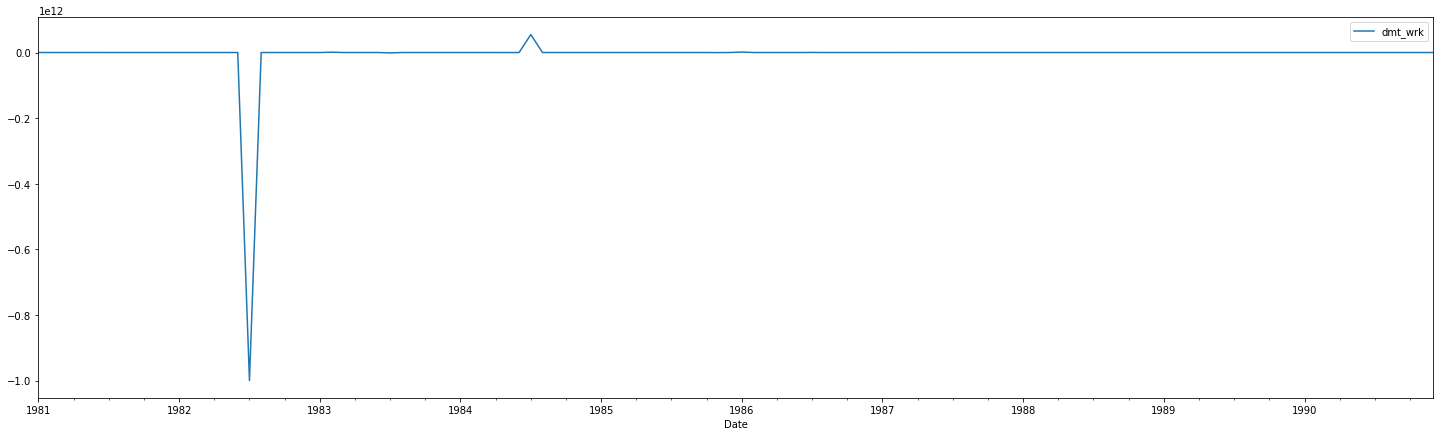

In [10]:
df.plot()

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

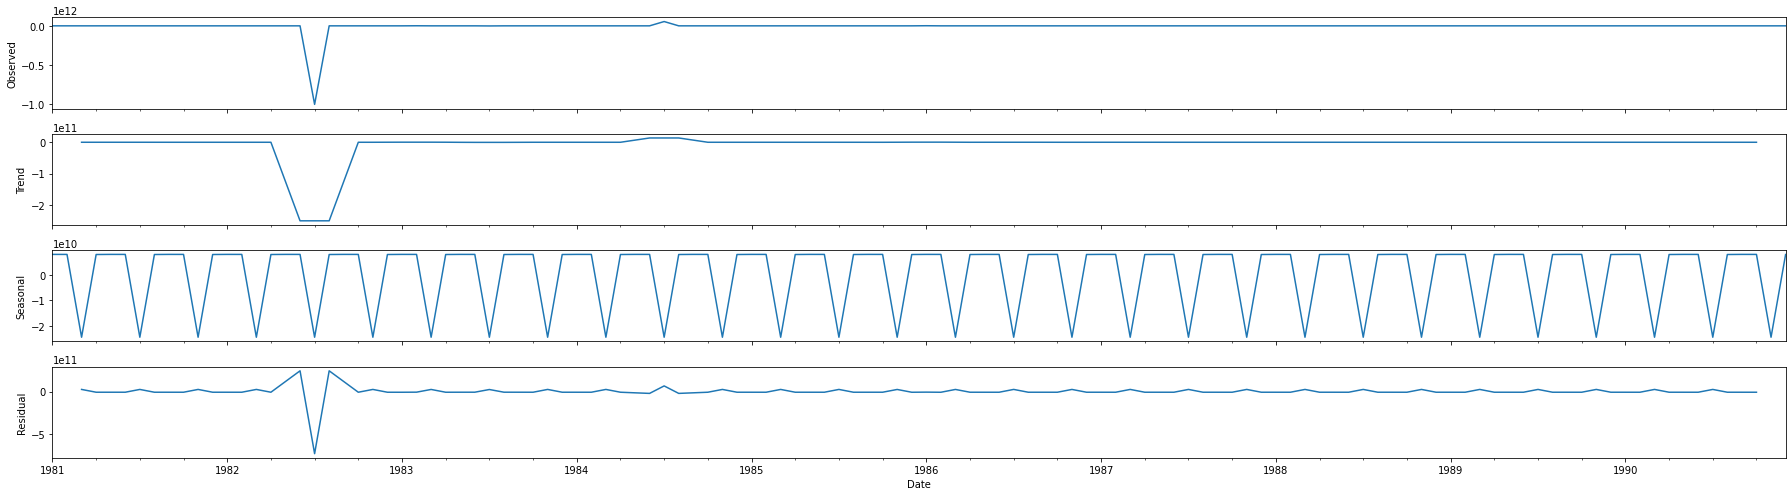

In [12]:
seasonal_decompose(df,model='additive',freq=4).plot();

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
train, test = train_test_split(df, test_size = 0.30)

In [25]:
train.tail()

,dmt_wrk
Date,
1990-09-01,2.750000e+02
1982-07-01,-1.000000e+12
1987-03-01,1.000004e+08
1983-05-01,3.180000e+02
1989-09-01,2.468000e+02


In [26]:
test

,dmt_wrk
Date,
1990-07-01,2.464000e+02
1982-09-01,2.184000e+02
1987-11-01,3.970000e+02
1984-12-01,3.810000e+02
1990-10-01,3.517000e+02
1985-09-01,2.680000e+02
1989-02-01,4.584000e+02
1990-12-01,4.178000e+02
1990-02-01,4.317000e+02


In [27]:
model = ExponentialSmoothing(train.dmt_wrk, trend='add', seasonal='add', seasonal_periods = 4).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [28]:
test_pred = model.forecast(steps = 36)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [29]:
test_pred

84    -2.138793e+11
85    -4.948725e+10
86    -5.182408e+10
87    -6.309791e+10
88    -2.234947e+11
89    -5.910264e+10
90    -6.143946e+10
91    -7.271329e+10
92    -2.331101e+11
93    -6.871802e+10
94    -7.105484e+10
95    -8.232867e+10
96    -2.427255e+11
97    -7.833340e+10
98    -8.067022e+10
99    -9.194405e+10
100   -2.523408e+11
101   -8.794878e+10
102   -9.028561e+10
103   -1.015594e+11
104   -2.619562e+11
105   -9.756417e+10
106   -9.990099e+10
107   -1.111748e+11
108   -2.715716e+11
109   -1.071795e+11
110   -1.095164e+11
111   -1.207902e+11
112   -2.811870e+11
113   -1.167949e+11
114   -1.191318e+11
115   -1.304056e+11
116   -2.908024e+11
117   -1.264103e+11
118   -1.287471e+11
119   -1.400210e+11
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
np.sqrt(mean_squared_error(test,test_pred))

153033952025.81076

In [33]:
final_model=ExponentialSmoothing(df.dmt_wrk,trend='add', seasonal='add', seasonal_periods=4).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [34]:
pred=final_model.forecast(4)

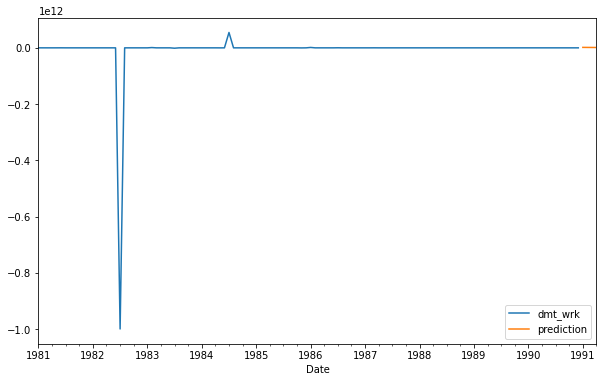

In [35]:
df['dmt_wrk'].plot(legend=True, label='dmt_wrk', figsize=(10,6))
pred.plot(legend=True, label='prediction')